# **Life Span Trends: Analyzing Longevity**
Dataset: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

## Project Description:
Our aim is to uncover what contributes to longer life, by analyzing factors that contribute to longer lifespans covering economic gdp, health diseases, and spending on healthcare by countries.

## Jazzy's Research Question Focus:
What are the 5 countries with the least amount of diseases and high life expectancy?



In [330]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import linregress

# The path to our CSV file
life_expectancy_data = Path("Life Expectancy Data.csv")
# Read our Life Expectancy data into pandas
life_expectancy_df = pd.read_csv(life_expectancy_data)
life_expectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


---

## **Part 1: Analyze Hepatitis B Coverage Trends 🔎**

### Summary: 

- Higher coverage for Hepatitis B means life expectancy expands another 10 years. 


### Key Findings:
- Low Hep B covered (9% - 35%) countries have an average Life Expectancy of 63 years.
- High Hep B covered (98%) countries have an average Life Expectancy of 73 years.

### Posible Action Steps:
- Building contracts with pharmacueticals & governments to deliver HIV coverage in lacking countries.


---

### **Cleaning Data 🧹...**

In [331]:
# Isolate Country, Hep B, Life Expectancy and drop NaN values
hep_children_coverage = life_expectancy_df[["Country", "Hepatitis B", "Life expectancy "]].dropna()
hep_children_coverage.head()

,Country,Hepatitis B,Life expectancy
0,Afghanistan,65.0,65.0
1,Afghanistan,62.0,59.9
2,Afghanistan,64.0,59.9
3,Afghanistan,67.0,59.5
4,Afghanistan,68.0,59.2


In [332]:
# Filter out rows where Hepatitis B or Life expectancy is 0
hep_children_coverage_filtered = hep_children_coverage[(hep_children_coverage["Hepatitis B"] != 0) & (hep_children_coverage["Life expectancy "] != 0)]
hep_children_coverage_filtered.head()

,Country,Hepatitis B,Life expectancy
0,Afghanistan,65.0,65.0
1,Afghanistan,62.0,59.9
2,Afghanistan,64.0,59.9
3,Afghanistan,67.0,59.5
4,Afghanistan,68.0,59.2


In [333]:
# Group by country and calculate the mean for each column and reset the index
hep_children_coverage_df = hep_children_coverage_filtered.groupby("Country").mean().reset_index()
hep_children_coverage_df.head()

,Country,Hepatitis B,Life expectancy
0,Afghanistan,64.562500,58.193750
1,Albania,98.000000,75.156250
2,Algeria,78.000000,74.325000
3,Angola,70.222222,50.866667
4,Antigua and Barbuda,98.266667,75.153333


### **Lowest Covered Countries 📝...**

In [334]:
# Find the lowest Hepatitis B covered countries
lowest_hep_b_coverage = hep_children_coverage_df.sort_values(by="Hepatitis B", ascending=True)
print("THE BOTTOM 5 LOWEST HEP B COVERED COUNTRIES:")

# Return the bottom 5 rows
lowest_hep_b_coverage.head()


THE BOTTOM 5 LOWEST HEP B COVERED COUNTRIES:


,Country,Hepatitis B,Life expectancy
51,Equatorial Guinea,9.000000,58.050000
30,Canada,28.846154,82.230769
32,Chad,29.875000,52.387500
143,South Sudan,31.000000,57.300000
70,India,35.000000,66.191667


In [335]:
# Find the Average Life Expectancy - bottom 5 lowest covered countries
avg_low_hep_coverage = lowest_hep_b_coverage.head()["Life expectancy "].mean()
print(f"The average life expectancy is {avg_low_hep_coverage}.")


The average life expectancy is 63.23198717948718.


### **Highest Covered Countries 📝...**

In [336]:
# Find the highest Hepatitis B covered countries
highest_hep_b_coverage = hep_children_coverage_df.sort_values(by="Hepatitis B", ascending=False)

print("THE TOP 5 HIGHEST HEP B COVERED COUNTRIES:")
highest_hep_b_coverage.head()

THE TOP 5 HIGHEST HEP B COVERED COUNTRIES:


,Country,Hepatitis B,Life expectancy
55,Fiji,98.875000,68.712500
114,Oman,98.812500,74.843750
136,Seychelles,98.687500,72.375000
139,Slovakia,98.562500,74.750000
4,Antigua and Barbuda,98.266667,75.153333


In [337]:
# Find the average Life Expectancy of the top 5 highest covered countries
avg_high_hep_coverage = highest_hep_b_coverage.head()["Life expectancy "].mean()
print(f"The average life expectancy is {avg_high_hep_coverage}.")


The average life expectancy is 73.16691666666665.


### **Plotting Graph 📈**

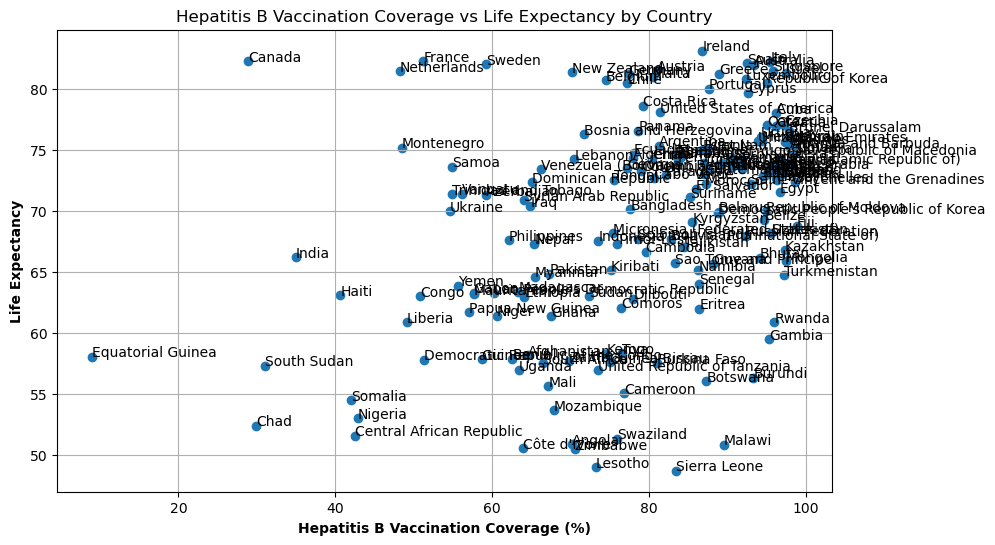

In [338]:
# Adjust the size of the graph by width and height - ensures the visual isn't too small
plt.figure(figsize=(10, 6))

# Create the scatter plot using Hepatitis B (x-axis) & Life expectancy (y-axis) 
plt.scatter(hep_children_coverage_df["Hepatitis B"], hep_children_coverage_df["Life expectancy "])

# Add country labels using a for loop
for i, country in hep_children_coverage_df["Country"].items():
    plt.text(hep_children_coverage_df["Hepatitis B"][i], 
             hep_children_coverage_df["Life expectancy "][i], 
             country)

# Set bolded labels and set title
plt.xlabel("Hepatitis B Vaccination Coverage (%)", fontweight="bold")
plt.ylabel("Life Expectancy", fontweight="bold")
plt.title("Hepatitis B Vaccination Coverage vs Life Expectancy by Country")

# Show grid
plt.grid(True)

# Save the file as a png
plt.savefig("Hep_B_Coverage_Chart")

# Show the chart
plt.show()

---

## **Part 2: Measles Report 🦠**

### Summary: 

- Greater cases of Measles leads to a decline in  12 years of Life Expectancy.

### Key Findings:
- Average Life Expectancy for the bottom 5 countries with the lowest Measles cases averages at about 74 years.
- Average Life Expectancy for the top 5 countries with the highest Measles cases averages at about 62 years.
- Countries with higher Measles cases can increase Life Expectancy to 20 years with better health treatment plans.

### Possible Action Steps:
- Working with Health Departments to understand how to limit and support countries with high Measles cases.
- Review world data on Measles affect on all 10 countries.
- Hiring more experts.

---

### **Cleaning Data 🧹...**

In [339]:
# Copy the view for Country, Measles, and Life Expectancy from original dataframe
measles_life_expectancy = life_expectancy_df[["Country", "Measles ", "Life expectancy "]].copy()

# Clean the data by dropping NaN values
measles_life_expectancy.dropna(inplace=True)

# Filter out rows where "Measles" column is not equal to 0
measles_life_expectancy = measles_life_expectancy[measles_life_expectancy["Measles "] != 0]

# Averages and grouped by country
grouped_measles_life_expectancy = measles_life_expectancy.groupby("Country").mean().reset_index()
grouped_measles_life_expectancy.head()

,Country,Measles,Life expectancy
0,Afghanistan,2362.250000,58.193750
1,Albania,77.636364,74.418182
2,Algeria,2392.461538,73.646154
3,Angola,3561.312500,49.018750
4,Argentina,5.333333,75.500000


### **Lowest Reported Cases (Per 1000) Bottom 5 Countries 📝:**

In [340]:
# Find the bottom 5 countries with the lowest measles cases
lowest_reported_countries = grouped_measles_life_expectancy.sort_values(by="Measles ", ascending=True)

print("THE BOTTOM 5 LEAST REPORTED MEASLES COUNTRIES:")
lowest_reported_countries.head()

THE BOTTOM 5 LEAST REPORTED MEASLES COUNTRIES:


,Country,Measles,Life expectancy
34,Costa Rica,1.000000,78.700000
129,Slovakia,1.333333,74.866667
71,Jamaica,1.500000,74.850000
46,El Salvador,2.000000,68.900000
112,Peru,2.000000,73.600000


In [341]:
# Find the Average Life Expectancy of Low Case Measles
avg_low_measles_life = lowest_reported_countries.head()["Life expectancy "].mean()
print(f"The average life expectancy is {avg_low_measles_life}.")

The average life expectancy is 74.18333333333334.


### **Highest Reported Cases (Per 1000) Bottom 5 Countries 📝:**

In [342]:
# Sort the values and produce the top 5
highest_measles_reports = grouped_measles_life_expectancy.sort_values(by="Measles ")

print("THE TOP 5 MOST REPORTED MEASLES COUNTRIES:")
highest_measles_reports.tail()

THE TOP 5 MOST REPORTED MEASLES COUNTRIES:


,Country,Measles,Life expectancy
65,Indonesia,16244.9375,67.55625
64,India,46454.1875,65.41875
40,Democratic Republic of the Congo,48922.6875,55.68750
106,Nigeria,51653.9375,51.35625
30,China,65857.9375,74.26250


In [343]:
# Find the Average Life Expectancy of Low Case Measles
avg_high_measles_life = highest_measles_reports.tail()["Life expectancy "].mean()
print(f"The average life expectancy is {avg_high_measles_life}.")

The average life expectancy is 62.85625.


### **Plotting Graph # 1 📈**

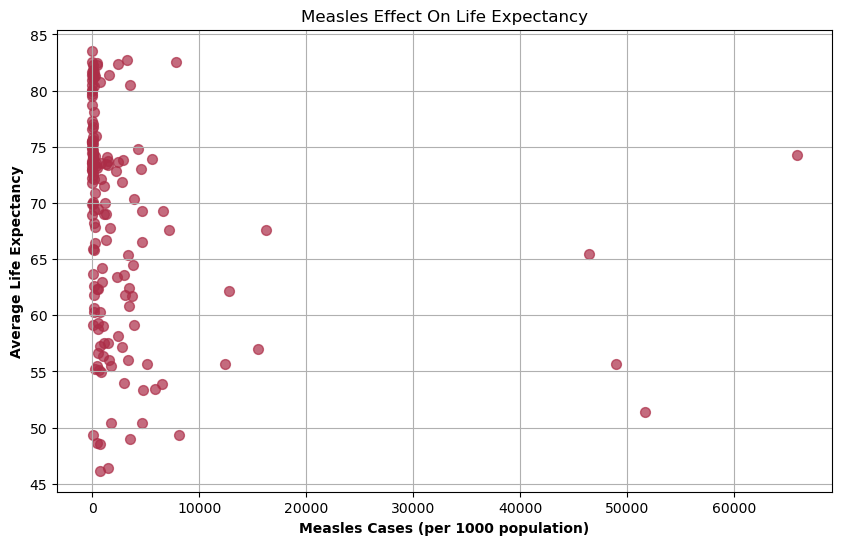

In [344]:
# Adjust the size of the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lowest_reported_countries["Measles "], lowest_reported_countries["Life expectancy "], s=50, c="#AC2D47", alpha=0.7)
plt.title("Measles Effect On Life Expectancy")

# Bold the Labels
plt.xlabel("Measles Cases (per 1000 population)", fontweight="bold")
plt.ylabel("Average Life Expectancy", fontweight="bold")

# Add the grid
plt.grid(True)

# Save chart as a png
plt.savefig("Measles_Effect_On_Life_Expectancy_Chart_Regular")

# Show the scatter plot
plt.show()

#### **Expanded Version ⬇️**

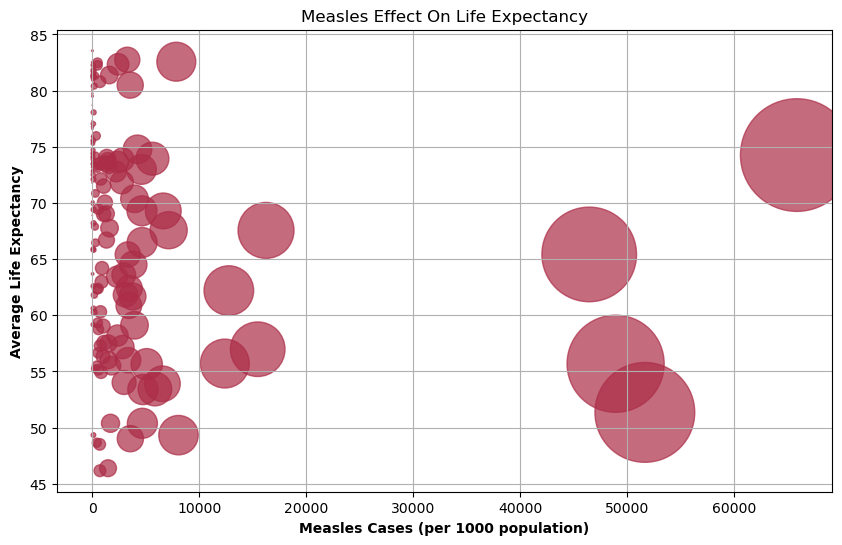

In [345]:
# Create the biiger bubbles in relation to measle cases graph 
plt.figure(figsize=(10, 6))
plt.scatter(lowest_reported_countries["Measles "], lowest_reported_countries["Life expectancy "], s=lowest_reported_countries["Measles "]/10, c='#AC2D47', alpha=0.7)
plt.title("Measles Effect On Life Expectancy")

# Bold the Labels
plt.xlabel("Measles Cases (per 1000 population)", fontweight="bold")
plt.ylabel("Average Life Expectancy", fontweight="bold")

# Add the grid
plt.grid(True)

# Save chart as a png
plt.savefig("Measles_Effect_On_Life_Expectancy_Chart_Expanded")

# Show the scatter plot
plt.show()


---

## **Part 3: Obesity & Life Expectancy Analysis 💡**

### Summary: 

Generally the higher the Life Expectancy the greater the rates of obesity.

### Key Findings:
- Low BMI rates were 19.08625.
- Low BMI rates correspond to a Life Expectancy up to 48 years old.
- High BMI rates were 47.269999999999996.
- High BMI rates correspond to a Life Expectancy up to 82 years old.

### Possible Action Steps:
- Understanding the factors that create obesity in countries with better Life Expectancy.
- Population census testing for further reviews and data 


---

### **Cleaning Data 🧹...**

In [346]:
# Select "Country", "Life expectancy ", " BMI " 
country_BMI_life_stats = life_expectancy_df[["Country", "Life expectancy ", " BMI "]]

# Group by country and calculate the mean for each disease
country_BMI_life_stats_grouped = country_BMI_life_stats.groupby('Country').mean().reset_index()

# Convert to DataFrame & sort by life expectancy
country_BMI_life_stats_grouped_df = pd.DataFrame(country_BMI_life_stats_grouped).sort_values(by='Life expectancy ')

# Drop NaN values
country_BMI_life_stats_grouped_df = country_BMI_life_stats_grouped_df.dropna()


### **Best Life Expectancy & BMI Relationship 📝:**

In [347]:
# Select the top 5 (best life expectancy) 
top_5_countries = country_BMI_life_stats_grouped_df.tail(5)
print("BEST LIFE EXPECTANCY & BMI RATES")
top_5_countries


BEST LIFE EXPECTANCY & BMI RATES


,Country,Life expectancy,BMI
60,France,82.21875,51.98125
166,Switzerland,82.33125,51.43750
75,Iceland,82.44375,51.07500
165,Sweden,82.51875,56.25000
84,Japan,82.53750,25.60625


In [348]:
# Find the Highest Average Life Expectancy 
avg_bmi_top_life = top_5_countries.head()["Life expectancy "].mean()
print(f"The average life expectancy is {avg_bmi_top_life}.")

The average life expectancy is 82.41.


In [349]:
# Find the Highest Average BMI
avg_bmi_top = top_5_countries.head()[" BMI "].mean()
print(f"The average BMI is {avg_bmi_top}.")

The average BMI is 47.269999999999996.


### **Worst Life Expectancy & BMI Relationship 📝:**

In [350]:
# And bottom 5 (worst life expectancy) countries
bottom_5_countries = country_BMI_life_stats_grouped_df.head(5)
print("WORST LIFE EXPECTANCY & BMI RATES")
bottom_5_countries

WORST LIFE EXPECTANCY & BMI RATES


,Country,Life expectancy,BMI
152,Sierra Leone,46.11250,18.30625
31,Central African Republic,48.51250,17.08750
94,Lesotho,48.78125,25.23750
3,Angola,49.01875,18.01875
100,Malawi,49.89375,16.78125


In [351]:
# Find the Highest Average Life Expectancy 
avg_bmi_bottom_life = bottom_5_countries.head()["Life expectancy "].mean()
print(f"The average life expectancy is {avg_bmi_bottom_life}.")

The average life expectancy is 48.463750000000005.


In [352]:
# Find the Highest Average BMI
avg_bmi_bottom = bottom_5_countries.head()[" BMI "].mean()
print(f"The average BMI is {avg_bmi_bottom}.")

The average BMI is 19.08625.


### **Plotting Graph # 1 📈**

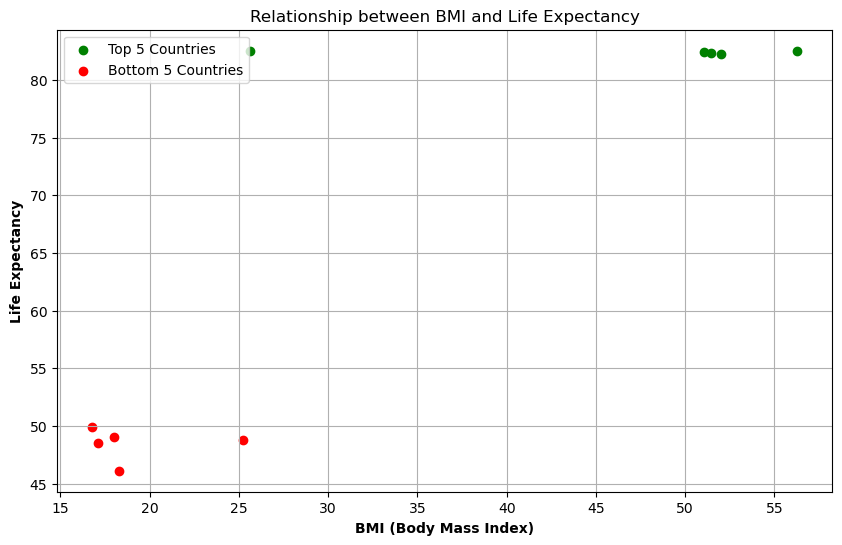

In [353]:
# Plotting Graph 1 - Top and Bottom 5 Only
plt.figure(figsize=(10, 6))

# Scatter plot for top 5 countries
plt.scatter(top_5_countries[" BMI "], top_5_countries["Life expectancy "], color='green', label='Top 5 Countries')

# Scatter plot for bottom 5 countries
plt.scatter(bottom_5_countries[" BMI "], bottom_5_countries["Life expectancy "], color='red', label='Bottom 5 Countries')

# Bold the labels
plt.xlabel('BMI (Body Mass Index)', fontweight='bold')
plt.ylabel('Life Expectancy', fontweight='bold')

# Add the title, legend, grid
plt.title('Relationship between BMI and Life Expectancy')
plt.legend()
plt.grid(True)

# Save chart as a png
plt.savefig("Top5_Bottom5_BMI_Life_Chart")

# Show the chart
plt.show()

### **Plotting Graph # 2 📈**

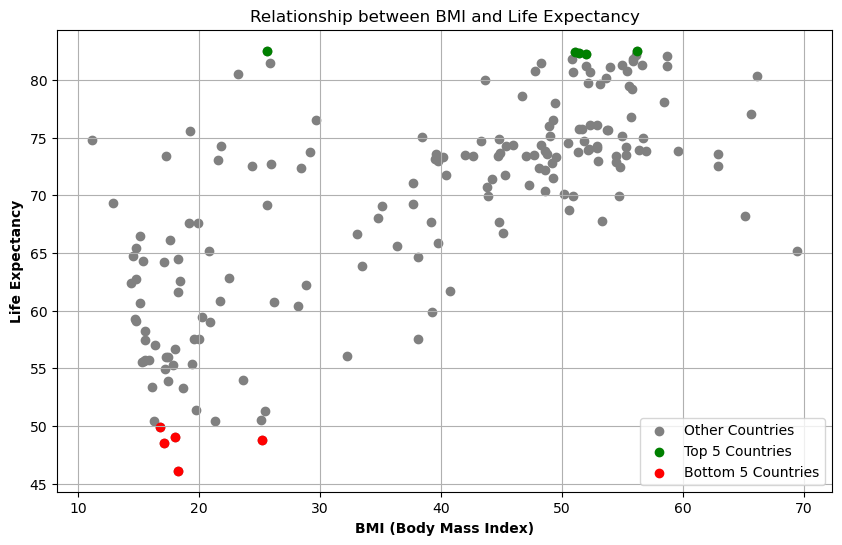

In [354]:
# Plotting Graph # 2 - All Countries Included (Top and Bottom Distinctive)
plt.figure(figsize=(10, 6))

# Scatter plot for all countries in grey
plt.scatter(country_BMI_life_stats_grouped_df[" BMI "], country_BMI_life_stats_grouped_df["Life expectancy "], color='grey', label='Other Countries')

# Scatter plot for top 5 countries
plt.scatter(top_5_countries[" BMI "], top_5_countries["Life expectancy "], color='green', label='Top 5 Countries')

# Scatter plot for bottom 5 countries
plt.scatter(bottom_5_countries[" BMI "], bottom_5_countries["Life expectancy "], color='red', label='Bottom 5 Countries')


# Bold the labels
plt.xlabel('BMI (Body Mass Index)', fontweight='bold')
plt.ylabel('Life Expectancy', fontweight='bold')

# Add the title, legend, grid
plt.title('Relationship between BMI and Life Expectancy')
plt.legend()
plt.grid(True)

# Save chart as a png
plt.savefig("All_Countries__BMI_Life_Chart")

# Show the chart
plt.show()

---

## **Part 4: HIV Prevalence & Life Expectancy Analysis 🧪**

### Summary: 

Similar to the Measles graph, there is greater Life Expectancy  with lower cases of deaths. We also notice a correlation of Measles and HIV which could possibly be happening simultaniously within countries, this could lead to a greater understanding of how to effectively get both diseases under control. HIV creates an imbalance from opitmal life expectancy (82) with 0.1% deaths affecting life expectancy by 14 years - possiblye due to stress and lack of sufficient health measures. Countries facing greater HIV see the effect double as 30 years are diminished in Life Expectancy findings. 

### Key Findings:
- The lowest average life expectancy is 68.5 years old with 0.1 HIV deaths.
- The highest average life expectancy is 51 years old with HIV averaged deaths at 22.8%.


### Posible Action Steps:
- Learn more about countries facing Measles and HIV, similar symptoms, and treatments 
- Working with suppliers and governments to pursue research and production of meds for relief

---

### **Cleaning Data 🧹...**

In [355]:
# Select "Country", "Life expectancy ", " HIV/AIDS"
hiv_life_expectancy = life_expectancy_df[["Country", "Life expectancy ", " HIV/AIDS"]]

# Group by country and calculate the mean for each disease
hiv_life_expectancy = hiv_life_expectancy.groupby('Country').mean().reset_index()

# Convert to DataFrame & sort
hiv_life_expectancy_df = pd.DataFrame(hiv_life_expectancy).sort_values(by=" HIV/AIDS", ascending=True)

# Drop NaN values
hiv_life_expectancy_df = hiv_life_expectancy_df.dropna()

### **Highest HIV Rates & Life Expectancy 📝:**

In [356]:
# Sort by highest life expectancy
print("TOP 5 COUNTRIES WITH THE HIGHEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS) AND LIFE EXPECTANCY")
hiv_life_expectancy_df.tail()

TOP 5 COUNTRIES WITH THE HIGHEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS) AND LIFE EXPECTANCY


,Country,Life expectancy,HIV/AIDS
100,Malawi,49.89375,16.68125
158,South Africa,57.50000,18.49375
94,Lesotho,48.78125,22.96875
192,Zimbabwe,50.48750,23.26250
164,Swaziland,51.32500,32.94375


In [357]:
# Find the Highest Average Life Expectancy 
avg_life_for_high_hiv = hiv_life_expectancy_df.tail()["Life expectancy "].mean()
print(f"The average life expectancy is {avg_life_for_high_hiv}.")

The average life expectancy is 51.597500000000004.


In [358]:
# Find the Average HIV RATE 
avg_highest_HIV_rate = hiv_life_expectancy_df.tail()[" HIV/AIDS"].mean()
print(f"The average HIV rate is {avg_highest_HIV_rate}.")

The average HIV rate is 22.869999999999997.


### **Lowest HIV Rates & Life Expectancy 📝:**

In [359]:
# Dispaly the 5 countries with the lowest amount of HIV deaths 
print("TOP 5 COUNTRIES WITH THE LOWEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS) AND LIFE EXPECTANCY")
hiv_life_expectancy_df.head()

TOP 5 COUNTRIES WITH THE LOWEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS) AND LIFE EXPECTANCY


,Country,Life expectancy,HIV/AIDS
0,Afghanistan,58.19375,0.1
108,Mexico,75.71875,0.1
109,Micronesia (Federated States of),68.20000,0.1
111,Mongolia,65.88750,0.1
112,Montenegro,74.50000,0.1


In [360]:
# Find the average Life Expectancy 
avg_low_HIV_life = hiv_life_expectancy_df.head()["Life expectancy "].mean()
print(f"The average life expectancy is {avg_low_HIV_life}.")
avg_low_HIV_life

The average life expectancy is 68.5.


68.5

In [361]:
# Find the Average HIV RATE 
avg_lowest_HIV_rate = hiv_life_expectancy_df.head()[" HIV/AIDS"].mean()
print(f"The average HIV rate is {avg_lowest_HIV_rate}.")

The average HIV rate is 0.1.


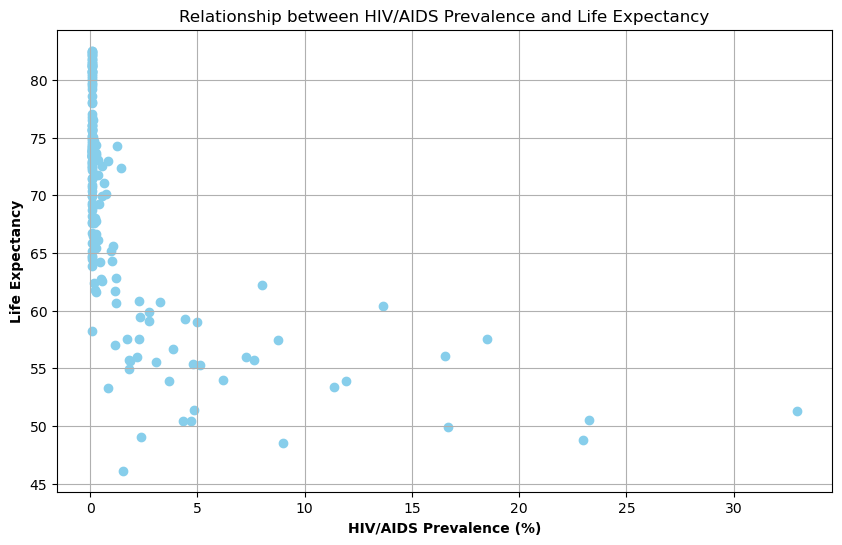

In [362]:
# Plotting the HIV and Life Expectancy Graph
plt.figure(figsize=(10, 6))
plt.scatter(hiv_life_expectancy_df[" HIV/AIDS"], hiv_life_expectancy_df["Life expectancy "], color='skyblue')

# Bold the labels
plt.xlabel('HIV/AIDS Prevalence (%)', fontweight='bold')
plt.ylabel('Life Expectancy', fontweight='bold')

# Add title & grid
plt.title('Relationship between HIV/AIDS Prevalence and Life Expectancy')
plt.grid(True)

# Save the image
plt.savefig("HIV_and_Life_Chart")

# show the chart
plt.show()


---

## Additional Tables 📌

---

In [363]:
# Select the columns of interest
top_diseases_for_life_expectancy = life_expectancy_df[["Country", "Life expectancy ", " BMI "]]

# Group by country and calculate the mean for each disease
grouped_by_country = top_diseases_for_life_expectancy.groupby('Country').mean().reset_index()

# Convert to DataFrame & sort
grouped_by_country_df = pd.DataFrame(grouped_by_country).sort_values(by='Life expectancy ', ascending=False)

# Drop NaN values
grouped_by_country_df = grouped_by_country_df.dropna()

# Sort by highest life expectancy
grouped_by_country_df.head()

,Country,Life expectancy,BMI
84,Japan,82.53750,25.60625
165,Sweden,82.51875,56.25000
75,Iceland,82.44375,51.07500
166,Switzerland,82.33125,51.43750
60,France,82.21875,51.98125


In [364]:
# Select the columns of interest
top_diseases_for_life_expectancy = life_expectancy_df[["Country", "Life expectancy ",  "Measles ", "Hepatitis B", "Polio", "Diphtheria ", " HIV/AIDS"]]

# Group by country and calculate the mean for each disease
grouped_by_country = top_diseases_for_life_expectancy.groupby('Country').mean().reset_index()

# Convert to DataFrame & sort
grouped_by_country_df = pd.DataFrame(grouped_by_country).sort_values(by='Life expectancy ', ascending=False)

# Drop NaN values
grouped_by_country_df = grouped_by_country_df.dropna()

# Sort by highest life expectancy
print("ALL DISEASES TOP LIFE EXPECTANCY")
grouped_by_country_df.head()



ALL DISEASES TOP LIFE EXPECTANCY


,Country,Life expectancy,Measles,Hepatitis B,Polio,Diphtheria,HIV/AIDS
165,Sweden,82.51875,18.9375,59.20,98.3125,98.3125,0.1
60,France,82.21875,2661.6250,51.25,98.2500,98.0625,0.1
82,Italy,82.18750,1961.3750,95.50,96.1250,94.7500,0.1
160,Spain,82.06875,449.8750,92.50,96.7500,96.7500,0.1
7,Australia,81.81250,103.9375,93.40,86.7500,86.8750,0.1


In [365]:
# Sort by lowest life expectancy
print("ALL DISEASES BOTTOM LIFE EXPECTANCY")
grouped_by_country_df.tail()

ALL DISEASES BOTTOM LIFE EXPECTANCY


,Country,Life expectancy,Measles,Hepatitis B,Polio,Diphtheria,HIV/AIDS
100,Malawi,49.89375,7559.4375,89.571429,89.0625,83.6250,16.68125
3,Angola,49.01875,3561.3125,70.222222,46.1250,47.6875,2.36875
94,Lesotho,48.78125,266.6875,73.230769,67.9375,79.4375,22.96875
31,Central African Republic,48.51250,699.4375,42.571429,41.3125,42.4375,8.98125
152,Sierra Leone,46.11250,673.8750,83.444444,71.7500,72.1250,1.51875


In [366]:
# Select the columns of interest
top_diseases_for_life_expectancy = life_expectancy_df[["Country", "Life expectancy ", " BMI ", "Hepatitis B", "Measles ", "Polio", "Diphtheria ", " HIV/AIDS"]]

# Group by country and calculate the mean for each disease
grouped_by_country = top_diseases_for_life_expectancy.groupby('Country').mean().reset_index()

# Convert to DataFrame & sort
grouped_by_country_df = pd.DataFrame(grouped_by_country).sort_values(by='Life expectancy ', ascending=False)

# Drop NaN values
grouped_by_country_df = grouped_by_country_df.dropna()

# Sort by highest life expectancy
print("ALL DISEASES WITH BMI")
grouped_by_country_df.head()

ALL DISEASES WITH BMI


,Country,Life expectancy,BMI,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS
165,Sweden,82.51875,56.25000,59.20,18.9375,98.3125,98.3125,0.1
60,France,82.21875,51.98125,51.25,2661.6250,98.2500,98.0625,0.1
82,Italy,82.18750,56.15000,95.50,1961.3750,96.1250,94.7500,0.1
160,Spain,82.06875,58.66875,92.50,449.8750,96.7500,96.7500,0.1
7,Australia,81.81250,55.86250,93.40,103.9375,86.7500,86.8750,0.1


In [367]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# The path to our CSV file
life_expectancy_data = Path("Life Expectancy Data.csv")

# Read our Life Expectancy data into pandas
life_expectancy_df = pd.read_csv(life_expectancy_data)

# Select the columns of interest
top_diseases_for_life_expectancy = life_expectancy_df[["Country"," HIV/AIDS",  " BMI "]]

# Group by country and calculate the mean for each disease
grouped_by_country = top_diseases_for_life_expectancy.groupby('Country').mean().reset_index()

# Convert to DataFrame & sort
grouped_by_country_df = pd.DataFrame(grouped_by_country).sort_values(by=" HIV/AIDS", ascending=False)

# Drop NaN values
grouped_by_country_df = grouped_by_country_df.dropna()

# Sort by highest life expectancy
print("COUNTRIES WITH THE HIGHEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS)")
grouped_by_country_df.head()

COUNTRIES WITH THE HIGHEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS)


,Country,HIV/AIDS,BMI
164,Swaziland,32.94375,25.50000
192,Zimbabwe,23.26250,25.13750
94,Lesotho,22.96875,25.23750
158,South Africa,18.49375,38.15000
100,Malawi,16.68125,16.78125


In [368]:
# Sort by highest life expectancy
print("COUNTRIES WITH THE LOWEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS)")
grouped_by_country_df.tail()

COUNTRIES WITH THE LOWEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS)


,Country,HIV/AIDS,BMI
78,Iran (Islamic Republic of),0.1,48.63125
75,Iceland,0.1,51.07500
74,Hungary,0.1,56.93125
67,Grenada,0.1,40.21250
96,Libya,0.1,54.83750


In [369]:
# Select the columns of interest
top_diseases_for_life_expectancy = life_expectancy_df[["Country", "Life expectancy ",  " HIV/AIDS"]]

# Group by country and calculate the mean for each disease
grouped_by_country = top_diseases_for_life_expectancy.groupby('Country').mean().reset_index()

# Convert to DataFrame & sort
grouped_by_country_df = pd.DataFrame(grouped_by_country).sort_values(by="Life expectancy ", ascending=False)

# Drop NaN values
grouped_by_country_df = grouped_by_country_df.dropna()

# Sort by highest life expectancy
print("BEST LIFE EXPECTANCY AND LOWEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS)")
grouped_by_country_df.head()

BEST LIFE EXPECTANCY AND LOWEST HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS)


,Country,Life expectancy,HIV/AIDS
84,Japan,82.53750,0.1
165,Sweden,82.51875,0.1
75,Iceland,82.44375,0.1
166,Switzerland,82.33125,0.1
60,France,82.21875,0.1


In [370]:
# Convert to DataFrame & sort
grouped_by_country_df = pd.DataFrame(grouped_by_country).sort_values(by="Life expectancy ", ascending=True)

# Drop NaN values
grouped_by_country_df = grouped_by_country_df.dropna()

# Sort by highest life expectancy
print("WORST LIFE EXPECTANCY & HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS)")
grouped_by_country_df.head()

WORST LIFE EXPECTANCY & HIV DEATHS (PER 1000 CHILDREN 0-4 YEARS)


,Country,Life expectancy,HIV/AIDS
152,Sierra Leone,46.11250,1.51875
31,Central African Republic,48.51250,8.98125
94,Lesotho,48.78125,22.96875
3,Angola,49.01875,2.36875
100,Malawi,49.89375,16.68125
